<a href="https://colab.research.google.com/github/ChengAng2001/shared/blob/main/RX5_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENGS93: Statistical Methods in Engineering 
## Homework 8

---

**IMPORTANT:**
Your answers in R should be put in the input box below the question. Make sure to *File->Save and Checkpoint* your notebook in order to save your code answers as you go. Once you are finished, save your R notebook and submit it to Canvas.

Note: Each sub-question is worth 5 points. In all problems, you are always allowed to do the basic arithmetic (i.e., addition, subtraction, multiplication, division, exponentiation and logarithms) using a calculator or any software (R, Excel, etc.).

---

### Question 1: 

This problem continues the scenario from R Exercise #5. Run the code below so that the maple.txt data is loaded and the necessary variables are created:

In [48]:
#Run this cell
maple <-read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/maple.txt", header = TRUE, sep = "\t", dec = ".")
summary(maple)
attach(maple)

VARMEAN=9*var(tapply(X=SAP, INDEX=FERT, FUN=mean))#VARMEAN = 405.4581
TEFFECTS=tapply(X=SAP, INDEX=FERT, FUN=mean)-mean(SAP)#Low=-6.7740741  Med=6.6481481  High=0.1259259
MEANVAR=mean(tapply(X=SAP, INDEX=FERT, FUN=var))#MEANVAR = 18.2938

      SAP            FERT              REGION         
 Min.   :74.20   Length:27          Length:27         
 1st Qu.:80.90   Class :character   Class :character  
 Median :87.00   Mode  :character   Mode  :character  
 Mean   :86.15                                        
 3rd Qu.:91.30                                        
 Max.   :98.20                                        

The following objects are masked from maple (pos = 3):

    FERT, REGION, SAP


The following objects are masked from maple (pos = 4):

    FERT, REGION, SAP




---

We  will  use  a  one-way  ANOVA  to  test  the  hypothesis  that  the  sap  productions  associated with  the three fertilizer applications are equal. An important first step in performing an ANOVA is to calculate the treatment sum of squares (SSTR).You may recall from lecture that the formula for SSTr is:

$SSTr = \sum_{i=1}^{I} J_i(\overline{X}_i - \overline{X}..)^2 = \sum_{i=1}^{I} J_i\overline{X}_i^2 - N\overline{X}^2$

### Question 1 part a)

Calculateand report the SSTR using either version of the formula above. Save it as the variable ``SSTR``.

In [49]:
SSTR=9*sum(TEFFECTS*TEFFECTS)
print(SSTR)

[1] 810.9163


The next step is to calculate the error sum of squares (SSE) using the formula:

$ SSE = \sum_{i=1}^{I}\sum_{j=1}^{J_{i}}(X_{ij} - \overline{X}_i)^2 \\
= \sum_{i=1}^{I}\sum_{j=1}^{J_{i}} {X_{ij}}^2 - \sum_{i=1}^{I}J_{ij}{\overline{X}_i}^2$

### Question 1 part b)

Calculate and report the `SSE` and save it as the variable `SSE`. Divide `SSTR` and `SSE` by their corresponding degrees of freedom to get `MSTR` and `MSE`, respectively. Compare the values of `MSTR` and `MSE` to the values of variables `VARMEAN` and `MEANVAR`. When you are comparing `MSTR` and `MSE`, what are you really comparing? Calculate the ratio of `MSTR` and `MSE` and save it as a variable `F`. Use the function `pf()` and the values of `F` and corresponding degrees of freedom to calculate and report a p-value for your hypothesis test. What do you conclude?

In [50]:
meanofeachgroup=tapply(X=SAP, INDEX=FERT, FUN=mean)
sumofsquares=sum(SAP*SAP)
SSE=sumofsquares-9*sum(meanofeachgroup*meanofeachgroup)
print(SSE)

[1] 439.0511


In [51]:
MSTR=SSTR/(3-1)
print(MSTR)
MSE=SSE/(27-3)
print(MSE)

[1] 405.4581
[1] 18.2938


In [52]:
F=MSTR/MSE
print(F)

[1] 22.1637


 When comparing MSTR and MSE, we are evalute the different of varance inside the group and between the group

In [53]:
pf(F,3-1,27-3,lower.tail = FALSE)

[1] 3.526929e-06

The sap productions associated with the three fertilizer applications are not equal

### Question 1 part c)

c. Confirm all your calculations made above using the ANOVA functions in R, either:

`maple.lm=lm(SAP~FERT)
 anova(maple.lm)`

or

`maple.aov1=aov(SAP~FERT)
 summary(maple.aov1)`

You can extract the values for the treatment effects using:

`model.tables(maple.aov1)`

Confirm that these match the values you calculated in question 3 in R Exercise 5.

In [54]:
SSTR=maple.lm=lm(SAP~FERT)
anova(maple.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FERT,2,810.9163,405.4581,22.1637,3.526929e-06
Residuals,24,439.0511,18.2938,NA,NA


They are matched

It is important that you confirm the assumptions made in performing an ANOVA by doing residuals diagnosis. You can generate all the necessary plots in R using: `plot(maple.aov1)`, but first issue the command `par(mfrow=c(2,2))` so that you can see all four plots at once.

### Question 1 part d)

Looking at the top two plots, can you conclude that the assumptions of ANOVA are met? Explain.


In [59]:
maple.aov1=aov(maple.lm)

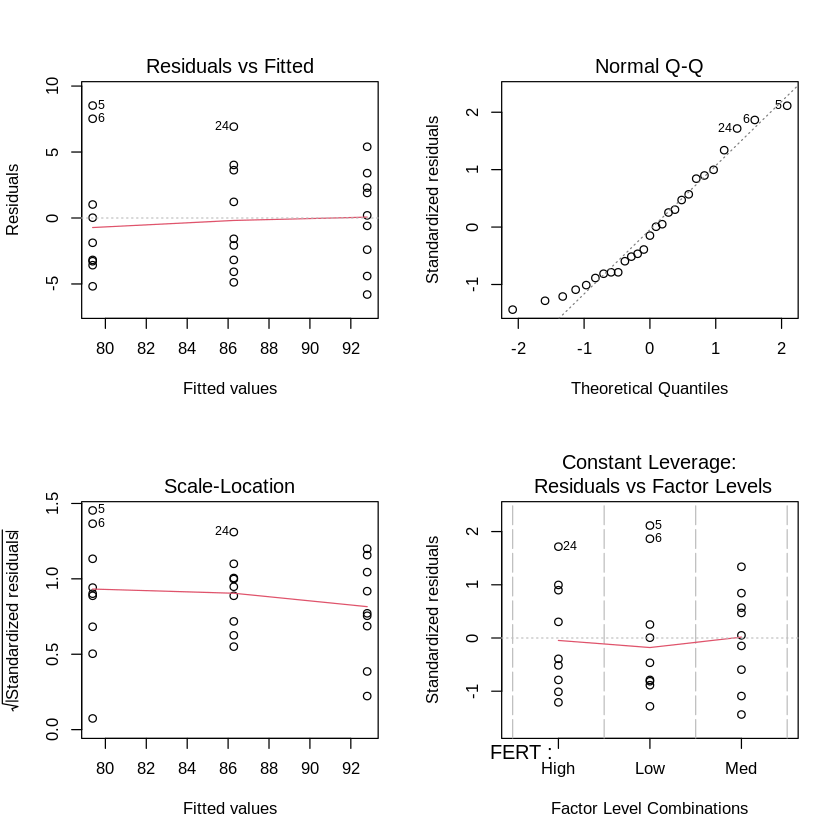

In [60]:
par(mfrow=c(2,2))
plot(maple.aov1)

Residuals should show no trend, which is good. The Normal QQ plot generally falls along the 1:1 line, Scale-Location doesn't show a tendency to have larger values at the left or right of the plot.  
The residual plot to assess the spreads within the various samples and the distribution of each sample is approximately normal.  
We can conclude that the assumptions of ANOVA are met.